In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sb

In [4]:
import sklearn

In [5]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv("kyphosis.csv")

In [9]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [10]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [12]:
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [13]:
df.isnull()

,Kyphosis,Age,Number,Start
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76,False,False,False,False
77,False,False,False,False
78,False,False,False,False
79,False,False,False,False


In [14]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

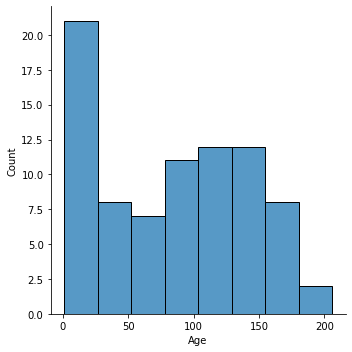

In [20]:
sb.displot(x="Age",data=df)

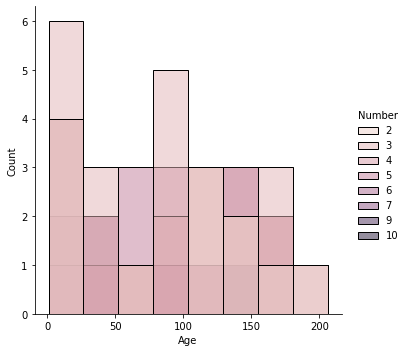

In [21]:
sb.displot(x="Age",hue = "Number",data=df)

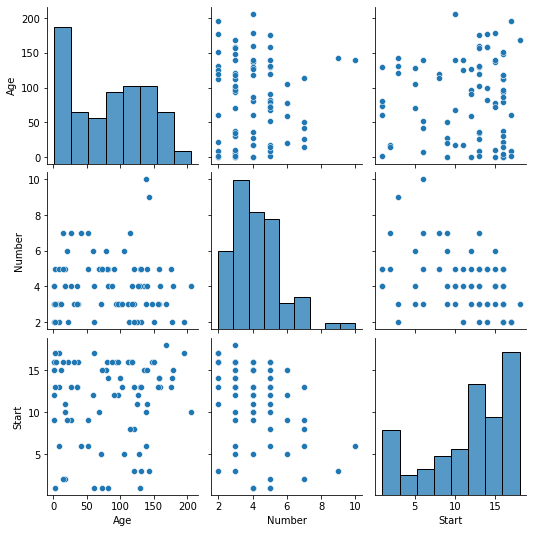

In [22]:
sb.pairplot(df)

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop("Kyphosis",axis=1)

In [28]:
y = df["Kyphosis"]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
 dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
prediction = dtree.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,prediction))

[[12  8]
 [ 4  1]]


In [36]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.75      0.60      0.67        20
     present       0.11      0.20      0.14         5

    accuracy                           0.52        25
   macro avg       0.43      0.40      0.40        25
weighted avg       0.62      0.52      0.56        25



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier()

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
pred = rfc.predict(X_test)

In [51]:
print(type(pred))

<class 'numpy.ndarray'>


In [52]:
print(confusion_matrix(y_test,pred))

[[17  3]
 [ 4  1]]


In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.81      0.85      0.83        20
     present       0.25      0.20      0.22         5

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.70      0.72      0.71        25



In [58]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64